In [2]:
import customize_motif_vec
from glypy.io import glycoct
import extract_motif
from glypy.algorithms.subtree_search import subtree_of
import customize_motif_vec
import glycan_io
import extract_motif
import motif_class
import __init__
import json_utility
import glycan_profile
from importlib import reload
import pandas as pd
reload(__init__)
reload(extract_motif)
reload(motif_class)
reload(glycan_profile)
import seaborn as sns
import plot_glycan_utilities
reload(plot_glycan_utilities)
import matplotlib.pyplot as plt
from glypy.io import glycoct, iupac
import numpy as np
from copy import deepcopy

%matplotlib inline


In [127]:
root_addr = "/Users/apple/PycharmProjects/GlyCompare/pseudo_glycan/pseudo_glycan_figure1/"

# Select three glycan from HMO for pseudo glycoprofile

In [30]:
#shows occurance of motifs per glycans
hmo_dict = json_utility.load_json("/Users/apple/PycharmProjects/GlyCompare/hmo/glycanHMO_dict.json")
translation_dict = {
    'G45827GY':'LNT',
    'G48059CD':'LNnT',
    'G10422IZ':'''2'FL''',
    'G06210XB':'3FL',
    'G91237TK':'''3'SL''',
    'G01650PH':'LNFP I',
    'G98173LG':'LNFP II',
    'G83916HL':'LNFP III',
    'G19017MP':'LSTb',
    'G72506RN':'LSTc',
    'G38710SX':'DSLNT',
    'G70115XG':'DFLNT',
    'G24504JY':'FLNH',
    'G63053GR':'DFLNH',
    'G47928KI':'DSLNH',
    'FDSLNH':'FDSLNH'
}
new_dict = {}
for i in translation_dict:
    new_dict[translation_dict[i]] = hmo_dict[i]
selected_dict = {}
for i in ["""3FL""", "LNnT", """3'SL"""]:
    selected_dict[i] = new_dict[i]

# New start

In [31]:
root_ = root_addr

json_utility.store_json(root_+"glycan_dict.json", selected_dict)
pseudo_glycan_dict = {}
selected_list = []
selected_name = []
selected_vec = []
for items in selected_dict.items():
    selected_vec.append(items[1])
    pseudo_glycan_dict[items[0]] = glycoct.loads(items[1])
    selected_name.append(items[0])
    selected_list.append(glycoct.loads(items[1]))

In [32]:
glycan_dict_addr = root_ + "glycan_dict.json"
output_merged_motif_addr = root_+"glycan_motif_dict.json"
glycan_motif_dict = extract_motif.get_motif_pip(pseudo_glycan_dict, gly_len=22, output_file=root_+"glycan_motif_dict.json")
motif_dict = customize_motif_vec.merge_motif_dict_pipe(glycan_motif_dict, output_merged_motif_addr, glycan_dict_addr)
motif_vec = glycan_io.motif_dict_to_motif_vec(motif_dict)


start parallel
3 0.010097026824951172
3 0.013150215148925781
4 0.017672061920166016
closing poll
joining pool
finished pool
Start merge_glycan_motif_to_motif_dict
combine original
check merged motif vec len 25
get_motif_dict_degree_list_pipe
closing poll
joining pool
finished removing duplicate
after the cleaning the motif vec's length is 15
1 5
2 5
3 4
4 1
1 5
2 5
3 4
4 1
15


In [26]:
__init__.output_matched_dict_addr = root_ + "match_dict.json"
motif_occurance_vector_dict = customize_motif_vec.motif_matching_wrapper(motif_dict, glycan_motif_dict, __init__.output_matched_dict_addr)

1 5
2 5
3 4
4 1
15
get motif vec, the length is  15
finished  0
finished  1
finished  2
start processing 3'SL
start processing 3FL
start processing LNnT
closing poll
joining pool
converting dict


In [33]:
motif_data = pd.DataFrame(data=motif_occurance_vector_dict).sort_index(axis=1)
motif_data.head()

,3'SL,3FL,LNnT
0,1,1,1
1,1,1,2
2,0,0,1
3,0,1,0
4,1,0,0


# Generate data abundance table

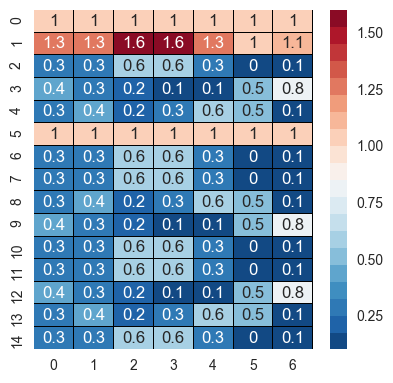

In [123]:
_3FL = np.array([1,1,0,1,0,1,0,0,0,1,0,0,1,0,0])
_3SL = np.array([1,1,0,0,1,1,0,0,1,0,0,0,0,1,0])
_LNnT= np.array([1,2,1,0,0,1,1,1,0,0,1,1,0,0,1])
ar0=_3FL*0.4+_3SL*0.3+_LNnT*0.3
ar1=_3FL*0.3+_3SL*0.4+_LNnT*0.3
ar2=_3FL*0.2+_3SL*0.2+_LNnT*0.6
ar3=_3FL*0.1+_3SL*0.3+_LNnT*0.6
ar4=_3FL*0.1+_3SL*0.6+_LNnT*0.3
ar5=_3FL*0.5+_3SL*0.5+_LNnT*0
ar6=_3FL*0.8+_3SL*0.1+_LNnT*0.1
pseudo_mat = np.matrix([ar0,ar1,ar2,ar3,ar4,ar5,ar6])
abundance_table = pd.DataFrame(data=pseudo_mat.transpose())
cmap = sns.color_palette("RdBu_r", 20)
fig, ax = plt.subplots(figsize=(4.5,4.5))
sns.heatmap(pseudo_mat.transpose(),cmap=cmap, linewidths=0.01,linecolor='black', annot=True,vmin=0.1, vmax=1.6)
plt.savefig(root_+'pseudo_profile_vec.eps')


In [124]:
reload(motif_class)
_motif_lab = motif_class.MotifLab(json_utility.load_json(output_merged_motif_addr)) # unicarbkb_motifs_12259.json
motif_vec = _motif_lab.motif_vec
tree_type_dp, edge_list = _motif_lab.get_dependence_tree_all()
_a = motif_class.NodesState(_motif_lab.motif_dep_tree, motif_class.get_weight_dict(abundance_table))
# node_attri, edge_attri, mod_nodes, mod_edges, merged_weights_dict = _a.nodes_dropping_pipe(drop_diff_abund=True)
node_attri, edge_attri, mod_nodes, mod_edges, merged_weights_dict = _a.nodes_dropping_pipe(drop_parellel=True, motif_vec=motif_vec)
# _collapsed_edge, _collapsed_node, _collapsed_dege_attri = _a.collapsing_potential_node()
_a.upload_network(_a.edges, _a.nodes)
# _a.upload_network(_collapsed_edge, _collapsed_node, edge_attri = _collapsed_dege_attri)

<class 'str'>
start building dependence_tree
1
2
3
4
Nodes dropped []
15 11
_a.nodes 15
merged_weights_dict 15
mod nodes [1, 3, 4, 5, 6, 8, 9, 10, 12, 13, 14]
After first drop 4 + 11 =  15 15.0
1 5 2 0.864197530864
1 6 3 0.385964912281
1 9 1 0.413793103448
1 10 1 0.385964912281
1 12 2 0.413793103448
1 13 2 0.413793103448
1 14 2 0.385964912281
3 8 2 0.666666666667
3 12 3 1.0
drop same level 3 12
3
4 9 2 0.666666666667
4 13 3 1.0
drop same level 4 13
4
5 12 1 0.510638297872
5 13 1 0.510638297872
5 14 1 0.478260869565
6 10 2 1.0
drop same level 6 10
6
6 14 3 1.0
drop same level 6 14
6
8 12 1 0.666666666667
9 13 2 0.666666666667
10 14 2 1.0
drop same level 10 14
10
After comparing same level, dropping_list 8
After second dropping 8 + 7 =  15 15.0
[0, 2, 11, 7, 3, 4, 6, 6, 10]
[(3, 12), (4, 13), (6, 10), (6, 14), (10, 14)]
[(1, 9), (5, 12), (5, 13), (8, 12)]
(1, 9)
(5, 12)
(5, 13)
(8, 12)
mod_nodes 7
mod_edges 4


In [125]:
len(mod_nodes)

7

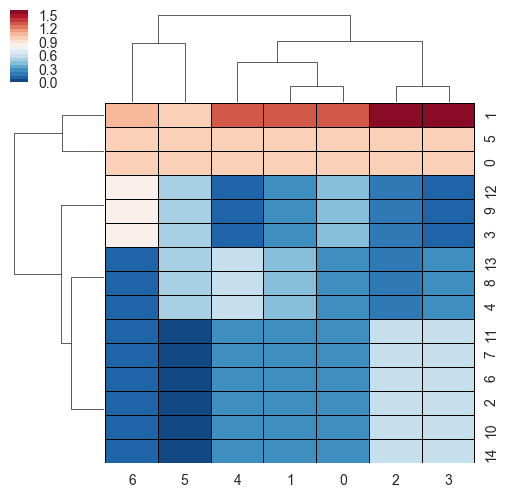

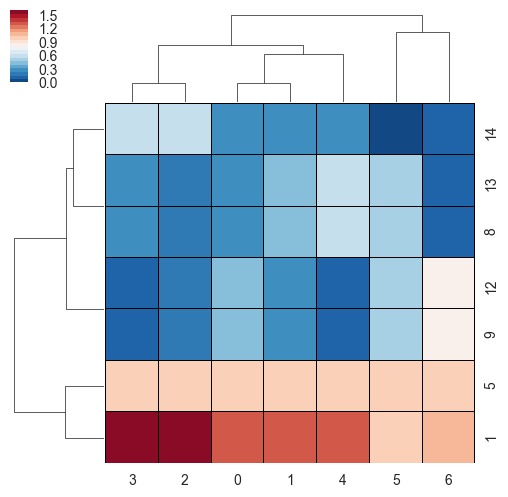

In [126]:
cmap = sns.color_palette("RdBu_r", 20)
# fig, ax = plt.subplots(figsize=(4.5,4.5))
sns.clustermap(abundance_table,cmap=cmap,linewidths=0.01,linecolor='black',figsize=(6,6))
plt.savefig(root_+'pseudo_profile_cluster.eps')
sns.clustermap(abundance_table[abundance_table.index.isin(mod_nodes)],cmap=cmap,linewidths=0.01,linecolor='black',figsize=(6,6))
plt.savefig(root_+'pseudo_profile_cluster_simplified.eps')

In [50]:
for i,j in enumerate(motif_vec):
    with open(root_+"motif_" + str(i) + ".txt", 'w') as f: 
        f.write(str(j))
#         motif_vec

In [12]:
selected_dict

{"3'SL": 'RES\n1b:b-dglc-HEX-1:5\n2b:b-dgal-HEX-1:5\n3b:a-dgro-dgal-NON-2:6|1:a|2:keto|3:d\n4s:n-acetyl\nLIN\n1:1o(4+1)2d\n2:2o(3+2)3d\n3:3d(5+1)4n',
 '3FL': 'RES\n1b:x-dglc-HEX-1:5\n2b:a-lgal-HEX-1:5|6:d\n3b:b-dgal-HEX-1:5\nLIN\n1:1o(3+1)2d\n2:1o(4+1)3d',
 'LNnT': 'RES\n1b:x-dglc-HEX-1:5\n2b:b-dgal-HEX-1:5\n3b:b-dglc-HEX-1:5\n4s:n-acetyl\n5b:b-dgal-HEX-1:5\nLIN\n1:1o(4+1)2d\n2:2o(3+1)3d\n3:3d(2+1)4n\n4:3o(4+1)5d'}

In [17]:
glycoct.loads(selected_dict["3'SL"]).mass()

633.21162802717

In [18]:
glycoct.loads(selected_dict['3FL']).mass()

488.17412031964

In [19]:
glycoct.loads(selected_dict['LNnT']).mass()

707.2484074587101

In [203]:
a = {
 2921.0: 1, 2923.0: 3, 2929.0: 1, 2938.0: 4,  3148.0: 2, 3149.0: 2, 3155.0: 1, 3156.0: 1, 3157.0: 2, 3158.0: 6, 3165.0: 5,     3295.0: 2, 3302.0: 6,  3344.0: 1, 3345.0: 1, 3352.0: 4,3359.0: 1, 3368.0: 4, 3374.0: 2, 3376.0: 3, 3377.0: 2, 3384.0: 1,     3441.0: 1, 3481.0: 3, 3490.0: 2, 3498.0: 4, 3503.0: 1, 3513.0: 1,3519.0: 1, 3520.0: 3, 3522.0: 2, 3535.0: 12, 3537.0: 2,3538.0: 4, 3546.0: 1, 3552.0: 3, 3554.0: 2, 3611.0: 4, 3612.0: 3, 3626.0: 5, 3627.0: 3, 3628.0: 1, 3635.0: 1, 3643.0: 2, 3660.0: 1, 3668.0: 2,
 3669.0: 1, 3683.0: 2, 3739.0: 3, 3741.0: 1, 3756.0: 3, 3757.0: 3, 3813.0: 1, 3826.0: 1, 3863.0: 1,
 3885.0: 2, 3886.0: 1, 3900.0: 2, 3902.0: 2, 3903.0: 1, 3917.0: 3, 3918.0: 2, 3919.0: 2, 3926.0: 1, 3927.0: 1, 3935.0: 1, 3951.0: 1,    3992.0: 2,     4007.0: 2, 4008.0: 2, 4014.0: 1, 4015.0: 1, 4029.0: 1, 4031.0: 1, 4046.0: 15, 4047.0: 2, 4048.0: 2, 4062.0: 1, 4063.0: 1, 4064.0: 3, 4072.0: 2,     4135.0: 2, 4139.0: 1, 4152.0: 1, 4153.0: 3, 4160.0: 1, 4176.0: 1, 4178.0: 1, 4194.0: 1, 4208.0: 1, 4210.0: 1, 4218.0: 1, 4219.0: 1, 4250.0: 3,     4398.0: 1,4414.0: 1, 4468.0: 1, 4484.0: 1,
 4494.0: 3, 4501.0: 1, 4541.0: 1, 4542.0: 1, 4558.0: 1, 4688.0: 1, 4704.0: 1, 4776.0: 1,4890.0:200, 4979.0: 1, 5125.0: 1,3149.0: 2, 5155.0: 1, 5156.0: 1, 5157.0: 2, 5158.0: 6, 5165.0: 5,     5295.0: 2,  5302.0: 6,  5344.0: 1, 5345.0: 1, 5352.0: 4, 5359.0: 1, 5368.0: 4, 5374.0: 2, 5376.0: 3, 5377.0: 2, 5384.0: 1, 5441.0: 1, 5481.0: 3, 5490.0: 2, 5498.0: 4, 5503.0: 1, 5513.0: 1, 5519.0: 1, 5520.0: 3, 5522.0: 2, 5535.0: 12, 5537.0: 2, 5538.0: 4, 5546.0: 1, 5552.0: 3, 5554.0: 2, 5611.0: 4,
 5612.0: 3, 5626.0: 5, 5627.0: 3, 5628.0: 1, 5635.0: 1,5643.0: 2, 5660.0: 1, 5668.0: 2, 5669.0: 1,5683.0: 2, 5739.0: 3, 5741.0: 1, 5756.0: 3, 5757.0: 3, 5813.0: 1, 5826.0: 1, 5863.0: 1,
 5885.0: 2, 5886.0: 1, 5900.0: 2, 5902.0: 2, 5903.0: 1, 5917.0: 3, 5918.0: 2, 5919.0: 2,5926.0: 1, 5927.0: 1, 5935.0: 1, 5951.0: 1,    5992.0: 2,    6007.0: 2, 6008.0: 2, 6014.0: 1, 6015.0: 1, 6029.0: 1, 6031.0: 1, 6046.0: 15, 6047.0: 2, 6048.0: 2, 6062.0: 1, 6063.0: 1,6064.0: 3, 6072.0: 2, 6135.0: 2, 6139.0: 1, 6152.0: 1, 6153.0: 3, 6160.0: 1, 6176.0: 1, 6178.0: 1,
 6194.0: 1, 6208.0: 1, 6210.0: 1, 6218.0: 1, 6219.0: 1, 6250.0: 3, 6398.0: 1, 6414.0: 1, 6332:198, 6282.0: 9, 6589.0: 1, 6291.0: 8, 6297.0: 3, 6298.0: 2, 6306.0: 4, 6307.0: 6, 6312.0: 1, 6314.0: 6, 6322.0: 4, 6323.0: 2,    6459.0: 2, 6404.0: 2, 6550.0: 2,6579.0: 1, 6725.0: 1, 6842.0: 2, 6849.0: 1, 6792.0: 5, 6781.0: 1, 6909.0: 1, 6918.0: 2,7072.0:300,7209.0: 13, 7218.0: 2, 7223.0: 5, 7224.0: 15, 7225.0: 6, 7239.0: 1, 7240.0: 23, 7241.0: 3, 7256.0: 3, 7257.0: 5, 7264.0: 8, 7297.0: 3,
 7298.0: 2, 7306.0: 4, 7307.0: 6, 7312.0: 1, 7314.0: 26, 7322.0: 4, 7323.0: 2, 7328.0: 2, 7330.0: 4, 7332.0: 3,7419.0: 1, 7450.0: 3,     7498.0: 1, 7414.0: 1, 7468.0: 1, 7484.0: 1, 7494.0: 3, 7501.0: 1, 7541.0: 1, 7542.0: 1,}

In [162]:
import pandas as pd

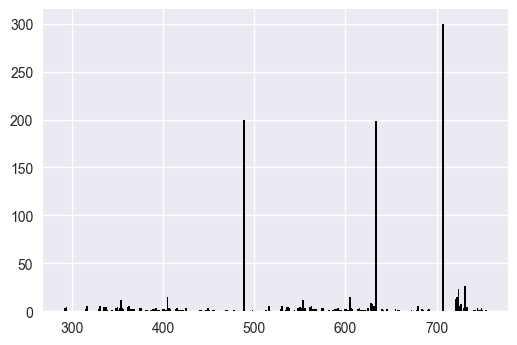

In [207]:
# ahh=pd.Series({round(k/10): a[k] for k in a.keys()})
# ahh
plt.bar(l,i,linewidth=0.5,width=1.9, color='black')
plt.savefig(root_+'pseudo_profile.eps', transparent=True)

In [204]:
j = sorted(list(a.keys()))
l = [i/10 for i in j]
i = [ a[k] for k in j ]

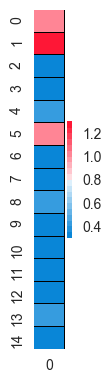

In [239]:
fig, ax = plt.subplots(figsize=(0.5,4.5))
sns.heatmap(np.matrix([1,1.3,0.3,0.3,0.4,1,0.3,0.3,0.4,0.3,0.3,0.3,0.3,0.4,0.3]).transpose(),cmap=sns.diverging_palette(247,10,99,54,1,20),linewidths=0.01,linecolor='black',)
plt.savefig(root_+'pseudo_profile_vec.eps')


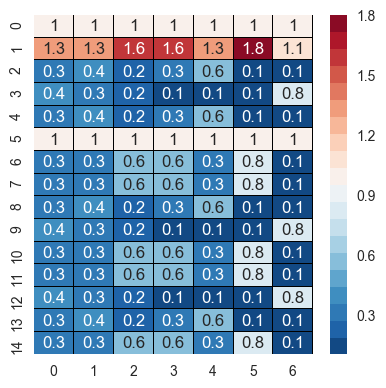

In [105]:
# 


# Run the pipeline
